In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('./basketball_stat.csv')

In [4]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [6]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [7]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [9]:
train.shape[0]

80

In [10]:
test.shape[0]

20

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [12]:
train[['3P', 'BLK', 'TRB']].head()

,3P,BLK,TRB
54,1.5,0.5,4.5
41,1.9,0.1,3.1
65,2.3,0.5,3.6
18,1.8,1.3,11.0
80,1.2,0.4,2.9


In [14]:
train[['Pos']].values.ravel()

array(['C', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'C', 'C',
       'C', 'C', 'C', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'C',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'SG', 'C', 'C',
       'C', 'SG', 'C', 'C', 'C', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'C',
       'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'C'], dtype=object)

In [15]:
max_k_range = train.shape[0]
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)
cross_validation_scores = []
x_train = train[["3P", "BLK", "TRB"]]
y_train = train[["Pos"]]

# 교차검증

In [20]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')

    cross_validation_scores.append(scores.mean())
print(cross_validation_scores)

[0.8625, 0.8625, 0.8625, 0.8875, 0.9, 0.8875, 0.8875, 0.8875, 0.875, 0.875, 0.875, 0.8625, 0.85, 0.85, 0.825, 0.825, 0.8125, 0.8125, 0.8, 0.8, 0.7625, 0.7625, 0.75, 0.75, 0.7375, 0.7375, 0.7375, 0.7375, 0.725, 0.725, 0.7125, 0.7125, 0.7, 0.6875, 0.525, nan, nan, nan, nan, 0.8625, 0.8625, 0.8625, 0.8875, 0.9, 0.8875, 0.8875, 0.8875, 0.875, 0.875, 0.875, 0.8625, 0.85, 0.85, 0.825, 0.825, 0.8125, 0.8125, 0.8, 0.8, 0.7625, 0.7625, 0.75, 0.75, 0.7375, 0.7375, 0.7375, 0.7375, 0.725, 0.725, 0.7125, 0.7125, 0.7, 0.6875, 0.525, nan, nan, nan, nan, 0.8625, 0.8625, 0.8625, 0.8875, 0.9, 0.8875, 0.8875, 0.8875, 0.875, 0.875, 0.875, 0.8625, 0.85, 0.85, 0.825, 0.825, 0.8125, 0.8125, 0.8, 0.8, 0.7625, 0.7625, 0.75, 0.75, 0.7375, 0.7375, 0.7375, 0.7375, 0.725, 0.725, 0.7125, 0.7125, 0.7, 0.6875, 0.525, nan, nan, nan, nan]


c:\users\wkdgy\pycharmprojects\ai_review\venv\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\wkdgy\pycharmprojects\ai_review\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\wkdgy\pycharmprojects\ai_review\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\wkdgy\pycharmprojects\ai_review\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\wkdgy\pycharmprojects\ai_review\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\users\wkdgy\pycharmpr

ValueError: x and y must have same first dimension, but have shapes (39,) and (117,)

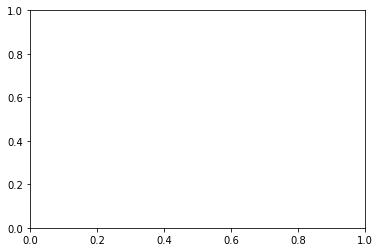

In [22]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of K')
plt.ylabel('Accuracy')
plt.show()

In [21]:
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print(k)

11


In [39]:
knn = KNeighborsClassifier(n_neighbors=3)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P','BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.values.ravel(), pred))

0.95


c:\users\wkdgy\pycharmprojects\ai_review\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'BLK vs 3P')

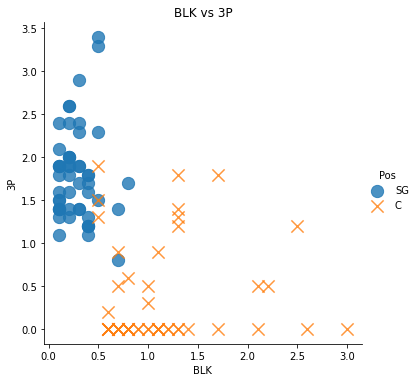

In [44]:
sns.lmplot('BLK', '3P', data=df, fit_reg=False, scatter_kws={"s":150}, markers=["o","x"], hue="Pos")
plt.title("BLK vs 3P")

c:\users\wkdgy\pycharmprojects\ai_review\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'BLK vs TRB')

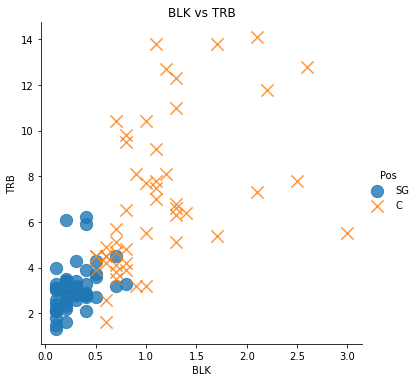

In [45]:
sns.lmplot('BLK', 'TRB', data=df, fit_reg=False, scatter_kws={"s":150}, markers=["o","x"], hue="Pos")
plt.title("BLK vs TRB")

# Linear Regression

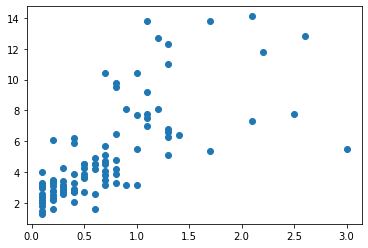

In [46]:
from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()
X = df['BLK']
y = df['TRB']
plt.plot(X, y, 'o')
plt.show()

In [47]:
line_fitter.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [49]:
line_fitter.predict([[1.1]])

array([6.51459544])

In [50]:
line_fitter.coef_

array([3.67474119])

In [51]:
line_fitter.intercept_

2.472380130766436

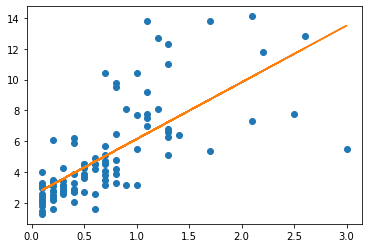

In [52]:
plt.plot(X,y,'o')
plt.plot(X, line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

# 우리팀 해야하는거
1. 왜 정규화 과정 안 거쳤는지 설명
2. linear_regression 외 다른 거 고려 안 한 이유? -> 역으로 왜 kNN 선택했는지?
3. 무엇을 보여줄지?
* 예상에는 시각화 해서 어떤 관계인지 설명
